In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/kaggle/input/hack-chunk-desc/train_segments.csv')

In [3]:
df

,Advertisement ID,Segment_num
0,1831845,16
1,4467135,11
2,2285593,0
3,3825366,0
4,2313008,0
...,...,...
17735,4299761,1
17736,2298577,0
17737,4018035,1
17738,3922868,0


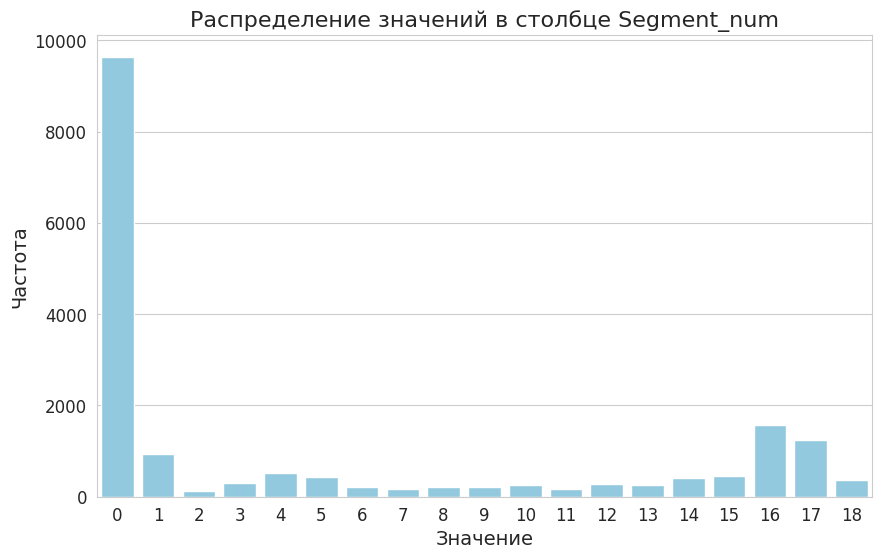

In [4]:
segment_counts = df['Segment_num'].value_counts().sort_values(ascending=False)

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, color='skyblue')

plt.title('Распределение значений в столбце Segment_num', fontsize=16)
plt.xlabel('Значение', fontsize=14)
plt.ylabel('Частота', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [5]:
segments = pd.read_excel('/kaggle/input/hack-chunk-desc/segment_dict.xlsx')
segments

,Segment_num,Segment,Comment
0,0,Промо/Нет/Нет,Промо или Имидж/Доставка или нет/Лояльность ил...
1,1,Имидж/Нет/Нет,Промо или Имидж/Доставка или нет/Лояльность ил...
2,2,Имидж/Нет/Да,Промо или Имидж/Доставка или нет/Лояльность ил...
3,3,Промо/Доставка/Нет,Промо или Имидж/Доставка или нет/Лояльность ил...
4,4,Промо/Нет/Да,Промо или Имидж/Доставка или нет/Лояльность ил...
5,5,Имидж/Доставка/Нет,Промо или Имидж/Доставка или нет/Лояльность ил...
6,6,промо/Нет/Нет,Промо или Имидж/Доставка или нет/Лояльность ил...
7,7,Имидж,NaN
8,8,Кредитование,NaN
9,9,Range,NaN


In [6]:
data = pd.read_csv('/kaggle/input/hack-chunk-desc/dashboard_data.csv')

In [7]:
data

,Advertisement ID,Advertiser,Brand,Media Type,Estimated cost RUB,Year,Month
0,3388448,X5 RETAIL GROUP,ПЯТЕРОЧКА,TV Nat,66882.400,2019,2
1,3594590,FIX PRICE,FIX PRICE,TV Nat,111866.300,2019,4
2,3673802,X5 RETAIL GROUP,ПЯТЕРОЧКА,TV Reg,237.250,2019,1
3,3673802,X5 RETAIL GROUP,ПЯТЕРОЧКА,TV Reg,0.000,2019,1
4,3673803,X5 RETAIL GROUP,ПЯТЕРОЧКА,TV Reg,335.400,2019,1
...,...,...,...,...,...,...,...
386688,4287525,ЯНДЕКС,ЯНДЕКС,TV Nat,189584.325,2022,5
386689,4287525,ЯНДЕКС,ЯНДЕКС,TV Nat,29050.245,2022,5
386690,4287525,ЯНДЕКС,ЯНДЕКС,TV Nat,0.000,2022,5
386691,4287525,ЯНДЕКС,ЯНДЕКС,TV Nat,456666.840,2022,5


In [8]:
with open('/kaggle/input/hack-chunk-desc/readme.md', 'r') as file:
    readme_content = file.read()

print(readme_content)

### Добро пожаловать на кейс MediaWise "Креативный фильтр"!
*** 
В представленном архиве вы можете увидеть следующие файлы

1. Папка **data** - различные рекламные креативы следующих форматов: .wav, .mp4, .avi, .flv, .wbm, .ogg. Каждый файл носит название, соответствующее Advertisement ID - уникальный идентификатор рекламного креатива.
2. Файл **train_segments.csv** - сопоставления идентификаторам номеров сегментов.
3. Файл **segment_dict.xlsx** - словарь, отображающий номер сегмента в его название.
4. Файл **dashboard_data.csv** - информация по затратам на различные креативы по месяцам для использования при визуализации дашбордов. На один месяц может приходиться более одной строки с уникальным идентификатором - в таком случае затраты необходимо просуммировать.

***

##### Вашей задачей будет разработка модели определения типа сегмента креатива, а также программного интерфейса для доступа к ней.

На основе имеющихся данных и разметки необходимо разработать модель, которая предсказывает

In [9]:
import os

all_files = []
base_path = '/kaggle/input/hack-chunk-'

for i in ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10-stranger', '11', '12-stranger', '13', '14', '15', '16', '17'):
    folder_path = f"{base_path}{i}"
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            full_path = os.path.join(root, file)
            all_files.append(full_path)

In [10]:
len(all_files) == len(df)

True

In [11]:
id_to_path = {}
for file_path in all_files:
    file_id = int(file_path.split('/')[-1].split('.')[0])
    id_to_path[file_id] = file_path

def get_path(ad_id):
    return id_to_path.get(ad_id, None)

In [12]:
df['path'] = df['Advertisement ID'].apply(get_path)

In [13]:
df

,Advertisement ID,Segment_num,path
0,1831845,16,/kaggle/input/hack-chunk-2/2/1831845.mp4
1,4467135,11,/kaggle/input/hack-chunk-16/16/4467135.avi
2,2285593,0,/kaggle/input/hack-chunk-5/5/2285593.wav
3,3825366,0,/kaggle/input/hack-chunk-8/8/3825366.avi
4,2313008,0,/kaggle/input/hack-chunk-6/6/2313008.wav
...,...,...,...
17735,4299761,1,/kaggle/input/hack-chunk-16/16/4299761.avi
17736,2298577,0,/kaggle/input/hack-chunk-5/5/2298577.wav
17737,4018035,1,/kaggle/input/hack-chunk-10-stranger/10/401803...
17738,3922868,0,/kaggle/input/hack-chunk-9/9/3922868.avi


In [16]:
from collections import Counter

file_extensions = [file_path.split('.')[-1] for file_path in all_files]
file_counts = Counter(file_extensions)

file_types = ['avi', 'flv', 'jpg', 'mp4', 'ogv', 'wav', 'wbm']

file_type_counts = {file_type: file_counts[file_type] for file_type in file_types}

file_type_counts

{'avi': 10548,
 'flv': 187,
 'jpg': 1,
 'mp4': 2254,
 'ogv': 18,
 'wav': 3550,
 'wbm': 1182}

In [24]:
df = df[~df['path'].str.endswith('.jpg')]

In [29]:
import subprocess

In [26]:
def convert_video_to_audio(video_path, output_dir='audio_files'):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    base_name = os.path.basename(video_path).split('.')[0]
    audio_path = os.path.join(output_dir, f"{base_name}.mp3")
    
    command = ['ffmpeg', '-i', video_path, '-vn', '-acodec', 'libmp3lame', '-b:a', '128k', audio_path]
    subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    
    return audio_path

In [27]:
def get_new_path(file_path):
    ext = file_path.split('.')[-1]
    if ext in ['mp4', 'avi', 'flv', 'ogv', 'wbm']:
        return convert_video_to_audio(file_path)
    else:
        return file_path

In [30]:
df['new_path'] = df['path'].apply(get_new_path)

/tmp/ipykernel_34/4185930770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_path'] = df['path'].apply(get_new_path)


In [40]:
import torch
from transformers import AutoModelForSpeechSeq2Seq, AutoProcessor, pipeline
from datasets import load_dataset

device = "cuda:0" if torch.cuda.is_available() else "cpu"
torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32

model_id = "openai/whisper-small"

model = AutoModelForSpeechSeq2Seq.from_pretrained(
    model_id, torch_dtype=torch_dtype, low_cpu_mem_usage=True, use_safetensors=True
)
model.to(device)

processor = AutoProcessor.from_pretrained(model_id)

pipe = pipeline(
    "automatic-speech-recognition",
    model=model,
    tokenizer=processor.tokenizer,
    feature_extractor=processor.feature_extractor,
    max_new_tokens=128,
    chunk_length_s=30,
    batch_size=16,
    return_timestamps=True,
    torch_dtype=torch_dtype,
    device=device,
)

2024-05-17 16:01:38.630200: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-17 16:01:38.630310: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-17 16:01:38.727726: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.87k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [43]:
%%time

sample = df['new_path'][0]

result = pipe(sample, generate_kwargs={"language": "russian"})
print(result["text"])

 Янда к станции Мини или другие улётные подарки при покупке Samsung Galaxy A31 с услугами связи? Какая красивая пара. Мы? А вы тоже ничего. Билайн. Живи на яркой стороне.
CPU times: user 1.02 s, sys: 13.4 ms, total: 1.04 s
Wall time: 1.14 s


In [45]:
df['Segment_num'] = df['Segment_num'].replace(6, 0)

/tmp/ipykernel_34/1999402674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Segment_num'] = df['Segment_num'].replace(6, 0)


In [47]:
df

,Advertisement ID,Segment_num,path,new_path
0,1831845,16,/kaggle/input/hack-chunk-2/2/1831845.mp4,audio_files/1831845.mp3
1,4467135,11,/kaggle/input/hack-chunk-16/16/4467135.avi,audio_files/4467135.mp3
2,2285593,0,/kaggle/input/hack-chunk-5/5/2285593.wav,/kaggle/input/hack-chunk-5/5/2285593.wav
3,3825366,0,/kaggle/input/hack-chunk-8/8/3825366.avi,audio_files/3825366.mp3
4,2313008,0,/kaggle/input/hack-chunk-6/6/2313008.wav,/kaggle/input/hack-chunk-6/6/2313008.wav
...,...,...,...,...
17735,4299761,1,/kaggle/input/hack-chunk-16/16/4299761.avi,audio_files/4299761.mp3
17736,2298577,0,/kaggle/input/hack-chunk-5/5/2298577.wav,/kaggle/input/hack-chunk-5/5/2298577.wav
17737,4018035,1,/kaggle/input/hack-chunk-10-stranger/10/401803...,audio_files/4018035.mp3
17738,3922868,0,/kaggle/input/hack-chunk-9/9/3922868.avi,audio_files/3922868.mp3


In [48]:
from imblearn.under_sampling import RandomUnderSampler

X = df.drop('Segment_num', axis=1)
y = df['Segment_num']

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

df_resampled = pd.concat([X_res, y_res], axis=1)

In [49]:
df_resampled

,Advertisement ID,path,new_path,Segment_num
10728,4119611,/kaggle/input/hack-chunk-12-stranger/12/411961...,audio_files/4119611.mp3,0
913,4024938,/kaggle/input/hack-chunk-10-stranger/10/402493...,audio_files/4024938.mp3,0
13500,4297908,/kaggle/input/hack-chunk-16/16/4297908.avi,audio_files/4297908.mp3,0
1593,4227173,/kaggle/input/hack-chunk-14/14/4227173.avi,audio_files/4227173.mp3,0
9846,4298607,/kaggle/input/hack-chunk-16/16/4298607.avi,audio_files/4298607.mp3,0
...,...,...,...,...
4754,2428287,/kaggle/input/hack-chunk-7/7/2428287.mp4,audio_files/2428287.mp3,18
6797,2423442,/kaggle/input/hack-chunk-7/7/2423442.wbm,audio_files/2423442.mp3,18
8018,4124885,/kaggle/input/hack-chunk-12-stranger/12/412488...,audio_files/4124885.mp3,18
10682,2357794,/kaggle/input/hack-chunk-6/6/2357794.mp4,audio_files/2357794.mp3,18


In [104]:
def get_text(sample):
    if os.path.exists(sample):
        result = pipe(sample, generate_kwargs={"language": "russian"})
        return result["text"]
    return None

In [105]:
df_resampled['text'] = df_resampled['new_path'].apply(get_text)

Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.
Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.
Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.
Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.
Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.
Whisper did not predict an ending timestamp, which can happen if audio is cut off in the m

In [107]:
df_resampled = df_resampled.dropna(subset=['text'])

In [108]:
df_resampled

,Advertisement ID,path,new_path,Segment_num,text
10728,4119611,/kaggle/input/hack-chunk-12-stranger/12/411961...,audio_files/4119611.mp3,0,"Цема иносмосковский прованцааль 67% 700 мл, 8..."
913,4024938,/kaggle/input/hack-chunk-10-stranger/10/402493...,audio_files/4024938.mp3,0,Успей купить до воскресенья! В метро макароны...
13500,4297908,/kaggle/input/hack-chunk-16/16/4297908.avi,audio_files/4297908.mp3,0,"Чё, чё? Ничего себе цена! В дексе! Форель Кур..."
1593,4227173,/kaggle/input/hack-chunk-14/14/4227173.avi,audio_files/4227173.mp3,0,Товар дня! Только с 22 по 25 ноября. Сыр ламб...
9846,4298607,/kaggle/input/hack-chunk-16/16/4298607.avi,audio_files/4298607.mp3,0,"Число здесь, кругом, регулярные поставки. Все..."
...,...,...,...,...,...
4754,2428287,/kaggle/input/hack-chunk-7/7/2428287.mp4,audio_files/2428287.mp3,18,ВК Фестонлайн Проведем каникулы вместе с Би-2...
6797,2423442,/kaggle/input/hack-chunk-7/7/2423442.wbm,audio_files/2423442.mp3,18,"Даже если год прошел в делах доли от близких,..."
8018,4124885,/kaggle/input/hack-chunk-12-stranger/12/412488...,audio_files/4124885.mp3,18,В любой ситуации есть место для вашего любимо...
10682,2357794,/kaggle/input/hack-chunk-6/6/2357794.mp4,audio_files/2357794.mp3,18,ДИНАМИЧНАЯ МУЗЫКА


In [177]:
df_resampled.to_csv('resampled_data.csv')

In [197]:
import os
import shutil

folder_path = "/kaggle/working/audio_files"

zip_file_path = "/kaggle/working/audio_files.zip"

/kaggle/working/audio_files.zip